# Autocorrelación

 En ocasiones los valores que toma una variable en el tiempo no son independientes entre sí, sino que un valor determinado depende los valores anteriores, por lo cual, existen dos formas de medir esta dependencia.

<ul>
<li>Función de Autocorrelación Simple (ACF): mide la correlación entre dos variables separadas por K periodos. </li>

<li>Función de autocorrelación parcial (PACF): a diferencia del ACF la PACF considera los retardos intermedios entre las dos variables. </li>
</ul>




In [22]:
import pandas as pd
import numpy as np
from matplotlib import pyplot

# load data
dataset = pd.read_csv('data/canada.txt')
print dataset

      Unnamed: 0         CST  Max.TemperatureC  Mean.TemperatureC  \
0              1    2000-1-1                -4                 -8   
1              2    2000-1-2                -1                -11   
2              3    2000-1-3               -17                -23   
3              4    2000-1-4                -1                -15   
4              5    2000-1-5                -9                -12   
5              6    2000-1-6               -13                -16   
6              7    2000-1-7                 1                 -6   
7              8    2000-1-8                -2                 -4   
8              9    2000-1-9                -2                 -8   
9             10   2000-1-10                -1                -12   
10            11   2000-1-11               -20                -24   
11            12   2000-1-12               -16                -20   
12            13   2000-1-13               -14                -19   
13            14   2000-1-14      

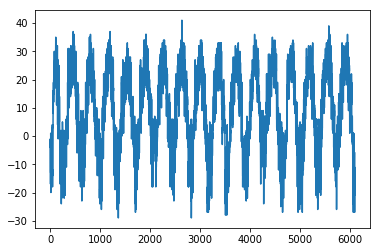

In [42]:
# plot máxima temperatura
pyplot.plot(dataset['Max.TemperatureC'])
pyplot.show()

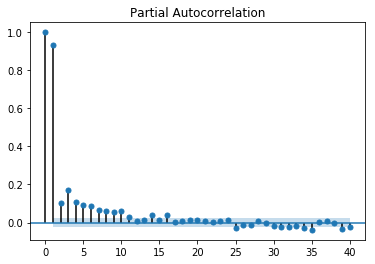

In [43]:
variables = ["Max.TemperatureC", "Mean.TemperatureC","Min.TemperatureC","DewPointC", "Mean.Humidity", "MinHumidity"]

# analisis de autocorrelación para cada una de las variables

from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(dataset['Max.TemperatureC'], lags=40)
pyplot.show()



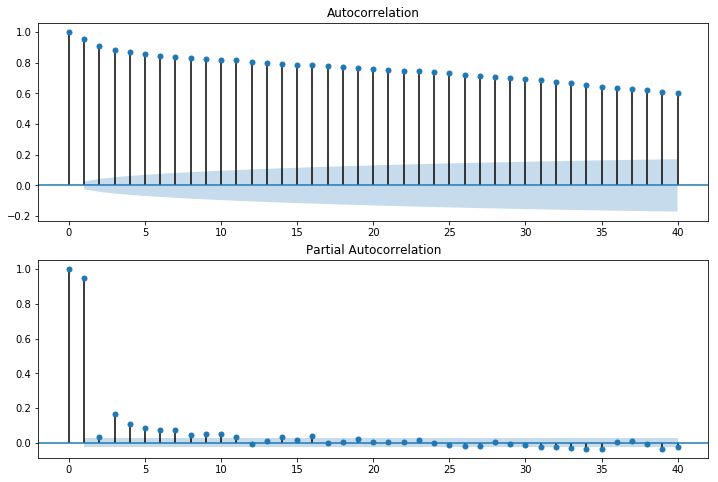

In [45]:
import statsmodels.api as sm

fig = pyplot.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dataset['Mean.TemperatureC'], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dataset['Mean.TemperatureC'], lags=40, ax=ax2)

pyplot.show()


In [49]:
values = sm.tsa.stattools.pacf(dataset['Mean.TemperatureC'],nlags=40)
print values

[  1.00000000e+00   9.51484624e-01   3.52760846e-02   1.67876767e-01
   1.08366106e-01   8.38452841e-02   7.61747738e-02   7.32081688e-02
   4.75461471e-02   5.40460020e-02   4.85284929e-02   3.50145182e-02
  -8.78914728e-03   1.22512366e-02   3.49438889e-02   1.82989306e-02
   3.81683342e-02   5.60674907e-04   2.86272860e-03   2.29489236e-02
   5.36384182e-03   2.23030567e-03   7.38120086e-03   1.55113071e-02
   8.69062017e-04  -1.50611668e-02  -1.59273676e-02  -1.68572825e-02
   2.45160996e-03  -7.29500422e-03  -1.11701790e-02  -2.72732366e-02
  -2.23071011e-02  -2.76002496e-02  -3.35780992e-02  -3.48770993e-02
   6.03306103e-03   1.04594763e-02  -5.52807381e-03  -3.51866996e-02
  -2.25889525e-02]
